# WEATHER PREDICTION

Using the Columns :

    precipitation
    temp_max
    temp_min
    wind We are going to predict the weather condition :
    drizzle
    rain
    sun
    snow
    fog

In [1]:
# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# LOADING DATA

In [3]:
data=pd.read_csv('seattle-weather.csv')

In [4]:
#to display top 5 rows of dataset

data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# DATA CLEANING

In [5]:
data.shape

(1461, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
#checking null values

data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
#checking duplicate

data.duplicated().sum()

0

In [9]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [10]:
#spliting the data columns into day, months, year

data[['year', 'month','day']]=data['date'].str.split('-', expand=True)

In [11]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,01,02
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,01,03
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,01,04
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,01,05


In [12]:
#drop the date column

data.drop('date', axis=1, inplace=True)

In [13]:
data.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,10.9,10.6,2.8,4.5,rain,2012,01,02
2,0.8,11.7,7.2,2.3,rain,2012,01,03
3,20.3,12.2,5.6,4.7,rain,2012,01,04
4,1.3,8.9,2.8,6.1,rain,2012,01,05


# EDA Process

In [14]:
data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'year',
       'month', 'day'],
      dtype='object')

Univariant Analysis

In [15]:
column=['precipitation','temp_max','temp_min', 'wind']

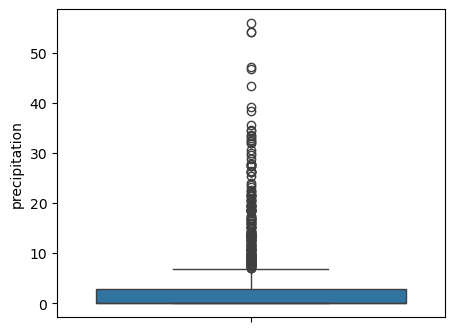

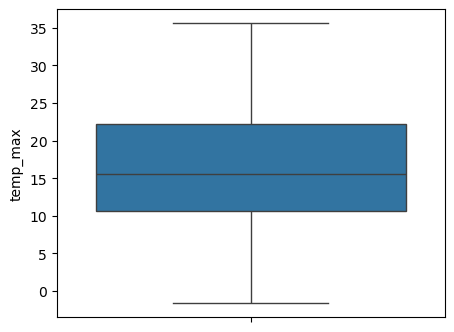

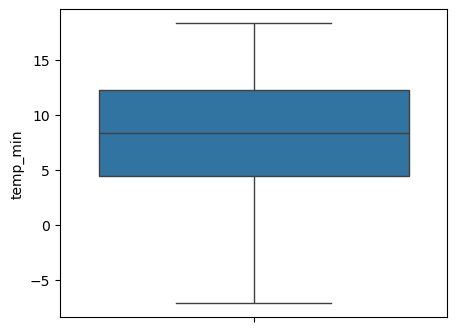

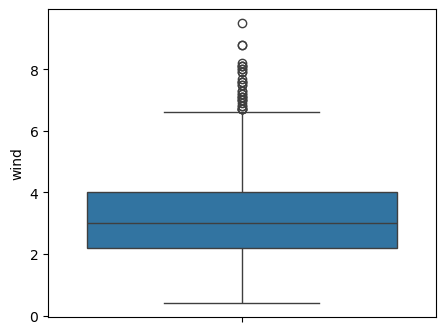

In [16]:
for i in column:
    plt.figure(figsize=(5,4))
    sns.boxplot(data[i])
    plt.show()

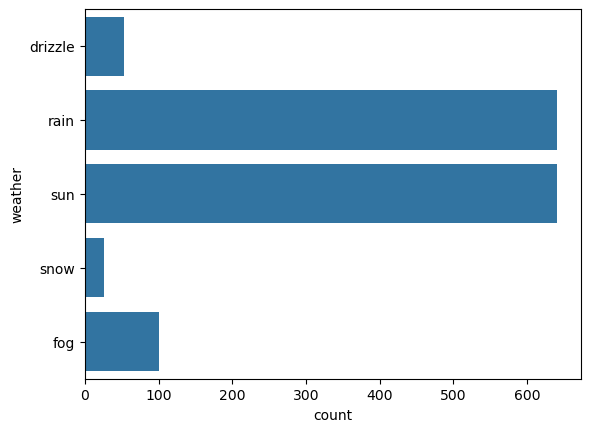

In [17]:
sns.countplot(data['weather'])
plt.show()

Bivariant Analysis


In [18]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

C:\Users\navee\AppData\Local\Temp\ipykernel_13648\3046641331.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["precipitation"][data.weather=='drizzle'])
C:\Users\navee\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\navee\AppData\Local\Temp\ipykernel_13648\3046641331.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
sim

<Axes: xlabel='precipitation', ylabel='Density'>

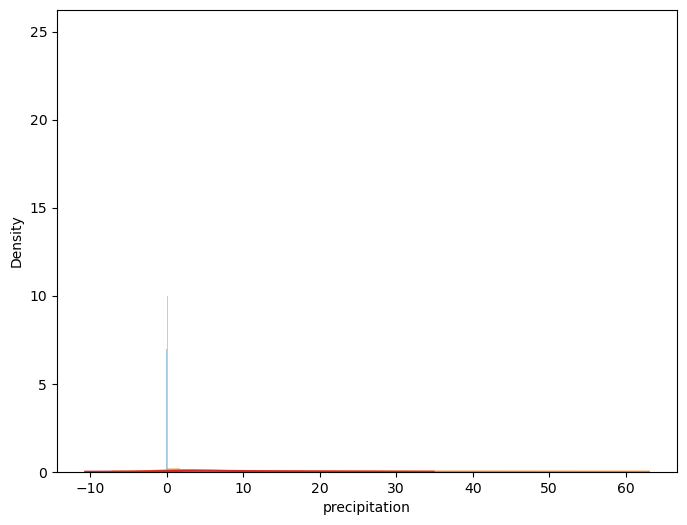

In [19]:
plt.figure(figsize=(8,6))

sns.distplot(data["precipitation"][data.weather=='drizzle'])
sns.distplot(data["precipitation"][data.weather=='rain'])
sns.distplot(data["precipitation"][data.weather=='sun'])
sns.distplot(data["precipitation"][data.weather=='snow'])
sns.distplot(data["precipitation"][data.weather=='fog'])

C:\Users\navee\AppData\Local\Temp\ipykernel_13648\2993591389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["temp_max"][data.weather=='drizzle'])
C:\Users\navee\AppData\Local\Temp\ipykernel_13648\2993591389.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["temp_max"][data.weath

<Axes: xlabel='temp_max', ylabel='Density'>

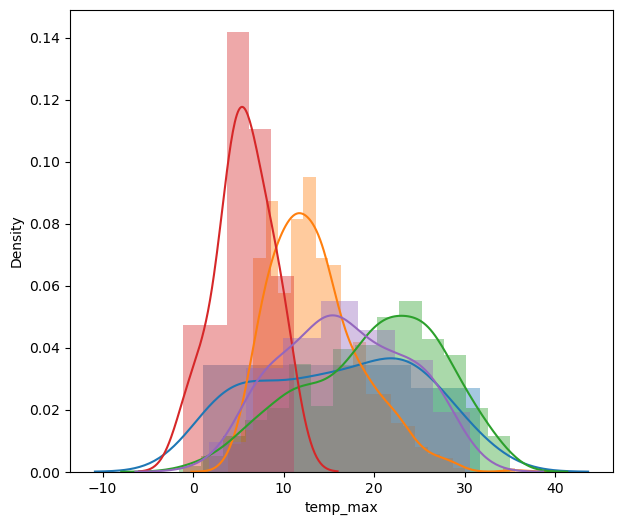

In [20]:
plt.figure(figsize=(7,6))
sns.distplot(data["temp_max"][data.weather=='drizzle'])
sns.distplot(data["temp_max"][data.weather=='rain'])
sns.distplot(data["temp_max"][data.weather=='sun'])
sns.distplot(data["temp_max"][data.weather=='snow'])
sns.distplot(data["temp_max"][data.weather=='fog'])

C:\Users\navee\AppData\Local\Temp\ipykernel_13648\1964431829.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["temp_min"][data.weather=='drizzle'])
C:\Users\navee\AppData\Local\Temp\ipykernel_13648\1964431829.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["temp_min"][data.weath

<Axes: xlabel='temp_min', ylabel='Density'>

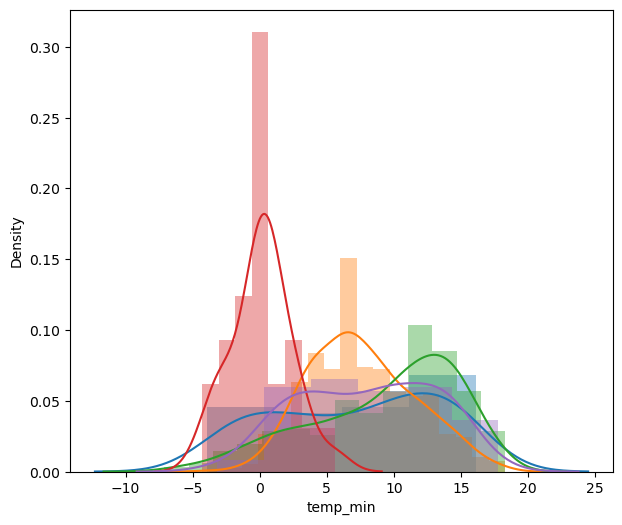

In [21]:
plt.figure(figsize=(7,6))
sns.distplot(data["temp_min"][data.weather=='drizzle'])
sns.distplot(data["temp_min"][data.weather=='rain'])
sns.distplot(data["temp_min"][data.weather=='sun'])
sns.distplot(data["temp_min"][data.weather=='snow'])
sns.distplot(data["temp_min"][data.weather=='fog'])

C:\Users\navee\AppData\Local\Temp\ipykernel_13648\1113359144.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["wind"][data.weather=='drizzle'])
C:\Users\navee\AppData\Local\Temp\ipykernel_13648\1113359144.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["wind"][data.weather=='rai

<Axes: xlabel='wind', ylabel='Density'>

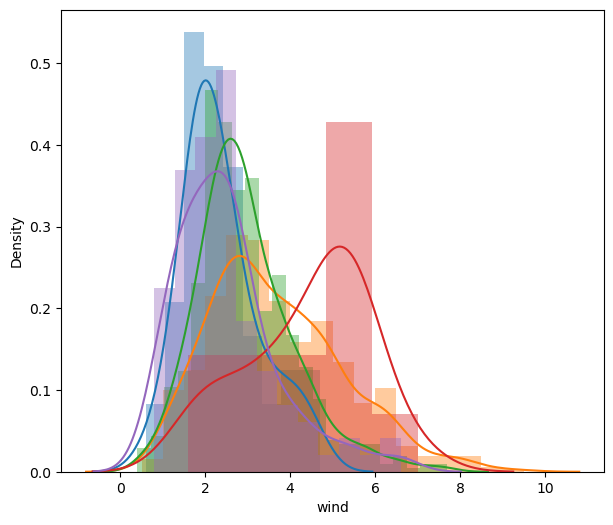

In [22]:
plt.figure(figsize=(7,6))
sns.distplot(data["wind"][data.weather=='drizzle'])
sns.distplot(data["wind"][data.weather=='rain'])
sns.distplot(data["wind"][data.weather=='sun'])
sns.distplot(data["wind"][data.weather=='snow'])
sns.distplot(data["wind"][data.weather=='fog'])

# Multivariant Analysis

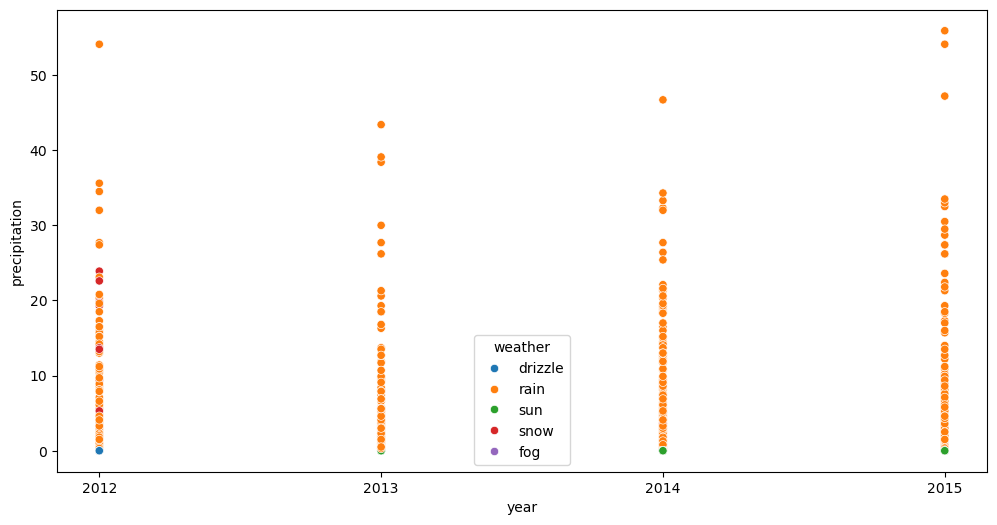

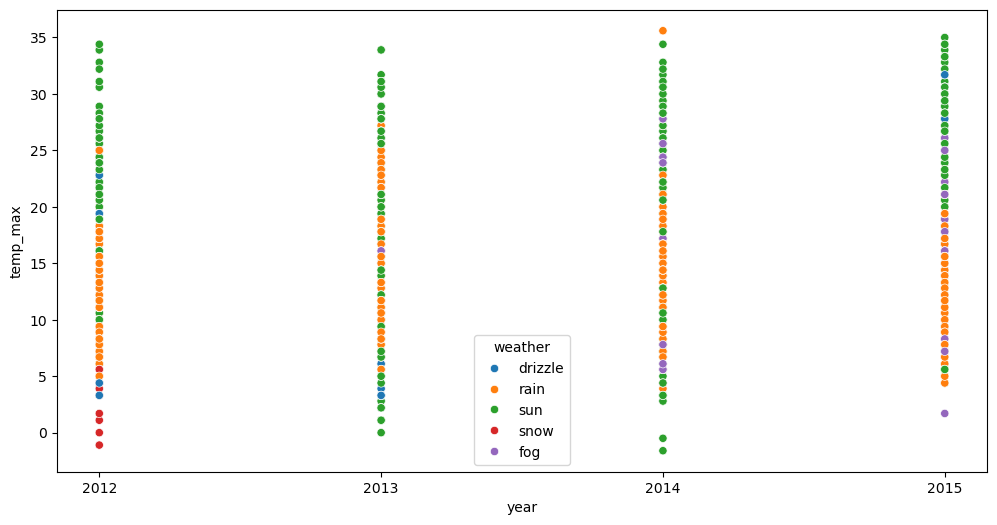

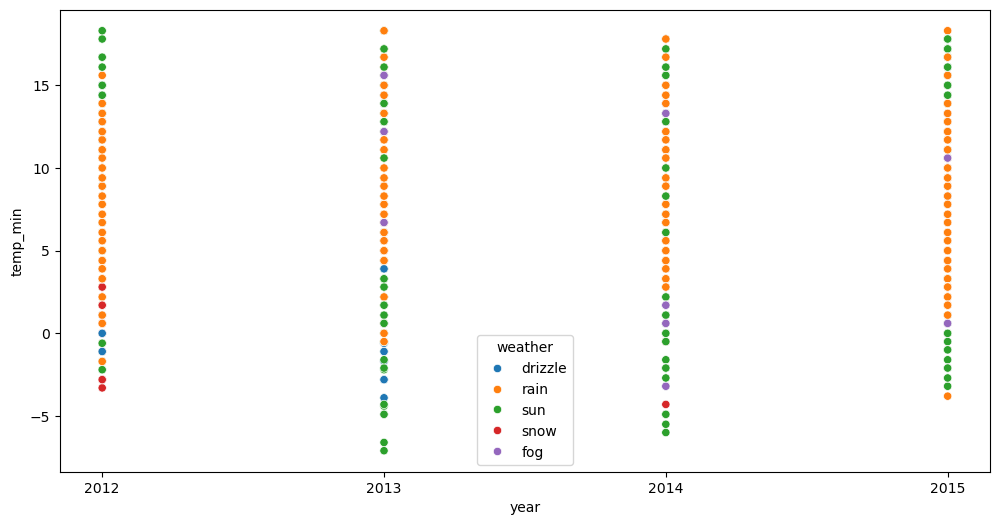

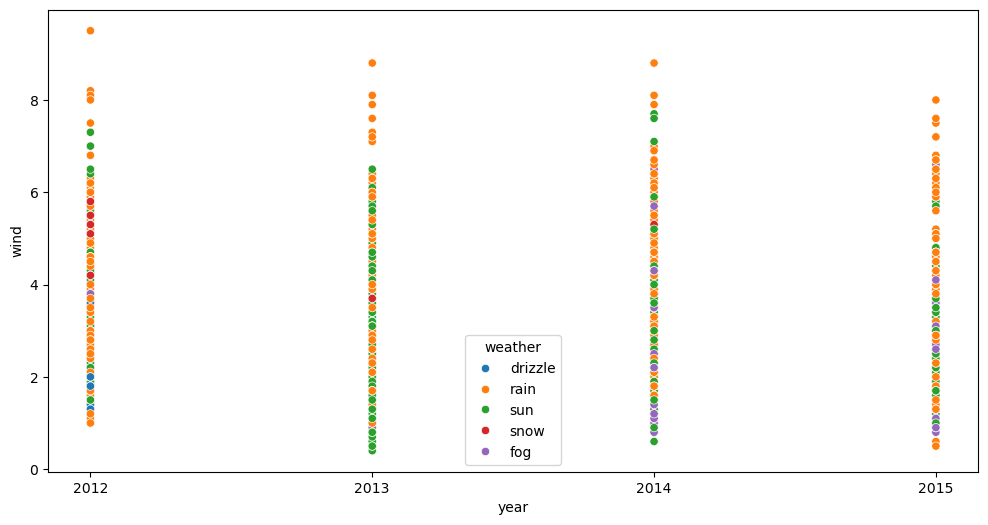

In [23]:
for i in column:
    plt.figure(figsize=(12,6))
    sns.scatterplot(x='year', y=i, hue="weather", data=data)
    plt.show()

# Train and Test data Spliting

In [24]:
X=data.drop('weather', axis=1)

In [25]:
X

,precipitation,temp_max,temp_min,wind,year,month,day
0,0.0,12.8,5.0,4.7,2012,01,01
1,10.9,10.6,2.8,4.5,2012,01,02
2,0.8,11.7,7.2,2.3,2012,01,03
3,20.3,12.2,5.6,4.7,2012,01,04
4,1.3,8.9,2.8,6.1,2012,01,05
...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2015,12,27
1457,1.5,5.0,1.7,1.3,2015,12,28
1458,0.0,7.2,0.6,2.6,2015,12,29
1459,0.0,5.6,-1.0,3.4,2015,12,30


In [26]:
y=data['weather']

In [27]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

# Feature Scaling

In [28]:
le=LabelEncoder()

In [29]:
y=le.fit_transform(y)

In [30]:
y

array([0, 2, 2, ..., 1, 4, 4])

spliting the data into train and test data


In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.3)

In [33]:
X_train.shape, X_test.shape

((438, 7), (1023, 7))

In [37]:
#importing libraries for data transformation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
 #saving the model
    
import bz2,pickle
file = bz2.BZ2File('standardScalar.pkl','wb')
pickle.dump(scaler,file)
file.close()

In [39]:
X_train, X_test

(array([[-0.44948485, -0.25481006, -0.81712081, ..., -1.3044901 ,
         -0.4760443 , -0.72523009],
        [ 3.99038504, -0.40120583, -0.26447262, ...,  1.36544758,
          1.26878753,  0.08451334],
        [-0.44948485, -0.40120583, -0.48158441, ...,  1.36544758,
         -0.76684961, -0.49387482],
        ...,
        [-0.44948485, -0.32135359,  0.16975096, ..., -0.41451087,
         -0.76684961, -1.65065114],
        [-0.44948485, -1.27958042, -0.71843363, ...,  0.47546835,
         -1.63926552, -0.03116429],
        [-0.44948485,  1.07606053,  0.60397453, ...,  1.36544758,
         -0.185239  , -0.60955245]]),
 array([[-0.44948485,  1.67495229,  1.37373451, ..., -0.41451087,
          0.39637162, -1.41929588],
        [-0.44948485, -0.25481006, -0.71843363, ...,  0.47546835,
         -1.34846022,  1.35696729],
        [ 0.16758181, -0.32135359,  0.16975096, ...,  1.36544758,
         -1.05765491,  0.43154624],
        ...,
        [-0.44948485,  1.07606053,  1.2553099 , ...,  

# Algorithm

Logistic Regresssion

In [40]:
lr=LogisticRegression()

In [41]:
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred=lr.predict(X_test)

In [43]:
logistic=lr.score(X_test, y_test)

In [44]:
print(logistic)

0.7683284457478006


Naive bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
GNB=GaussianNB()

In [47]:
GNB.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred1=GNB.predict(X_test)

In [49]:
y_pred1

array([4, 4, 2, ..., 4, 2, 2])

In [50]:
naive=GNB.score(X_test, y_test)

In [51]:
print(naive)

0.8250244379276638


Random forest Classifier

In [52]:
rfc=RandomForestClassifier(n_estimators=10, criterion="entropy")

In [53]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [54]:
y_pred2=rfc.predict(X_test)

In [55]:
y_pred2

array([4, 4, 2, ..., 4, 2, 2])

In [56]:
random=rfc.score(X_test, y_test)

In [57]:
print(random)

0.8435972629521017


Support Machine Classifier

In [58]:
svc=SVC(kernel='linear', random_state=0)

In [59]:
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [60]:
y_pred3=svc.predict(X_test)

In [61]:
y_pred3

array([4, 4, 2, ..., 4, 4, 2])

In [62]:
support=svc.score(X_test, y_test)

In [63]:
print(support)

0.7781036168132942


# Confusion matrix

In [64]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,  12,   0,  27],
       [  0,   0,   5,   0,  74],
       [  1,   1, 376,   1,  68],
       [  0,   0,  15,   4,   0],
       [  0,   0,  32,   1, 406]], dtype=int64)

In [80]:
print(f"logistic regression accuracy score:{(logistic)*100} %")
print(f"naive bayes accuracy score:{(naive)*100} %")
print(f"random forest classifer accuracy score:{(random)*100} %")
print(f"support vector classfication accuracy score:{(support)*100} %")


logistic regression accuracy score:76.83284457478005 %
naive bayes accuracy score:82.50244379276637 %
random forest classifer accuracy score:84.35972629521017 %
support vector classfication accuracy score:77.81036168132943 %


Accuracy score of random forest classifer is more than all of the models which is 
random forest classifer accuracy score: 84.35972629521017

In [81]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=10, criterion="entropy"),
    'Support Vector Classifier': SVC(kernel='linear', random_state=0)
}

In [82]:
# save the models using pcikle

import pickle

with open('trainedmodelrfc.pkl', 'wb') as file:
    pickle.dump(rfc, file)

# combining all the machine learning models and predicting the weather

In [83]:
from sklearn.ensemble import VotingClassifier

In [84]:
model1=LogisticRegression()
model2=GaussianNB()
model3=RandomForestClassifier(n_estimators=10, criterion="entropy")
model4=SVC(kernel='linear', random_state=0)

# MAJORITY

In [85]:
# Combine the models using majority voting

ensemble=VotingClassifier(estimators=[('lr', model1), ('gnb', model2), ('rfc', model3), ('svc', model4)], voting='hard')

In [86]:
# Fit the ensemble on the training data
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('gnb', GaussianNB()),
                             ('rfc',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10)),
                             ('svc', SVC(kernel='linear', random_state=0))])

In [87]:
# Evaluate the performance of the ensemble on the testing data
print(f"Accuracy of the ensemble: {ensemble.score(X_test, y_test)*100} %")


Accuracy of the ensemble: 84.35972629521017 %


# STACKING

In [88]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score


In [89]:
# Create a stacking ensemble


In [90]:
stack = StackingClassifier(estimators=[('lr', model1), ('gnb', model2), ('rfc', model3), ('svc', model4)], final_estimator=LogisticRegression())

In [91]:
# Fit ensemble on data
stack.fit(X, y)

C:\Users\navee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('gnb', GaussianNB()),
                               ('rfc',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=10)),
                               ('svc', SVC(kernel='linear', random_state=0))],
                   final_estimator=LogisticRegression())

In [92]:
# Make predictions
y_pred = stack.predict(X)

In [93]:
# Evaluate performance
acc = accuracy_score(y, y_pred)
acc = acc*100
print(f'Accuracy: {acc:.2f} %')

Accuracy: 75.43 %


# BAGGING

In [94]:
from sklearn.ensemble import BaggingClassifier


In [95]:
# Define base model
model3=RandomForestClassifier(n_estimators=10, criterion="entropy")


In [96]:
# Create a bagging ensemble
bag = BaggingClassifier(base_estimator=model3, n_estimators=10)

In [97]:
# Fit ensemble on data
bag.fit(X, y)

C:\Users\navee\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        n_estimators=10))

In [98]:
# Make predictions
y_pred = bag.predict(X)

In [99]:
# Evaluate performance
acc = accuracy_score(y, y_pred)
acc = acc *100
print(f'Accuracy: {acc:.2f} %')

Accuracy: 96.30 %
